In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


data = pd.read_csv('Social_Network_Ads.csv')

<AxesSubplot: >

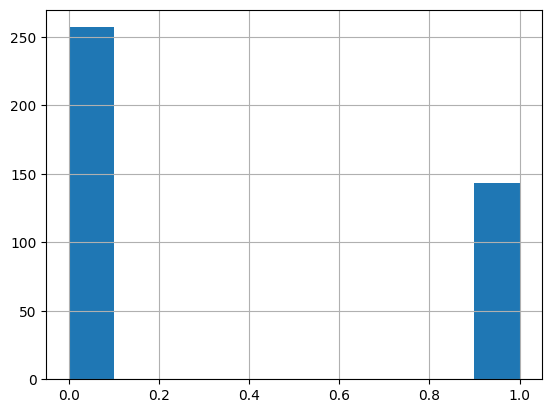

In [2]:
data["Purchased"].hist()

to tackle contiunous variable we will fit it to normal distribution

<AxesSubplot: xlabel='EstimatedSalary', ylabel='Count'>

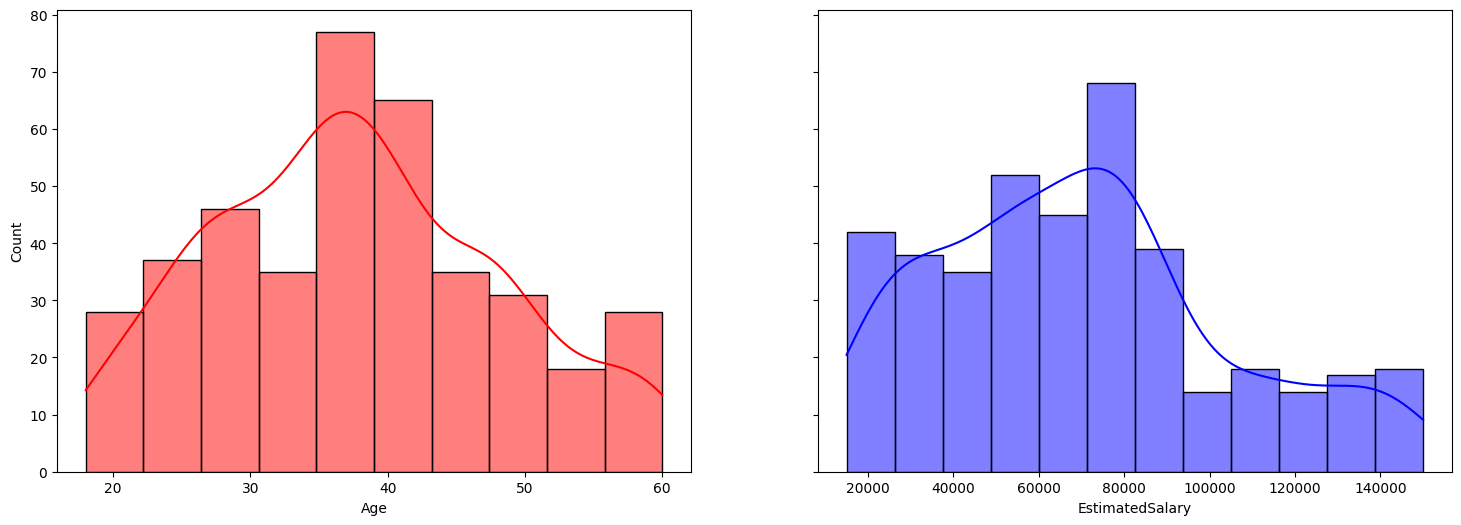

In [3]:
fig, axes = plt.subplots(1,2,figsize=(18,6), sharey=True)
sns.histplot(data, ax=axes[0],x="Age",kde=True,color='r')
sns.histplot(data, ax=axes[1],x="EstimatedSalary",kde=True,color='b')

#calculate propr probabilities 

In [4]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

conditional probabilty of x given y 


In [5]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [6]:
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]


    prior = calculate_prior(df, Y)

    Y_pred = []

    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)): #everyclasss through iterating
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)
    

testing the dataset

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Purchased")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[47  3]
 [ 7 23]]
0.8214285714285715


changing the continous to categorical

In [8]:
data["Ages"] = pd.cut(data["Age"].values, bins = 3, labels = [0,1,2])
data["Salary"] = pd.cut(data["EstimatedSalary"].values, bins = 3, labels = [0,1,2])

data = data.drop(columns=["Age", "EstimatedSalary"])
data = data[["Ages","Salary", "Purchased"]]
data.head(10)

,Ages,Salary,Purchased
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,1,0
5,0,0,0
6,0,1,0
7,0,2,1
8,0,0,0
9,1,1,0


finding proability of x based on y for categorical data

In [9]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

In [10]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # to calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique())) #to calculate likelihood
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

testing the categorical model

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="Purchased")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))


[[47  3]
 [ 6 24]]
0.8421052631578948
